In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Generate data
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)

# Convert to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)  # Reshape to (num_samples, num_features)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)


In [3]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(1, 50)  # Input: 1 feature, Output: 50 features
        self.fc2 = nn.Linear(50, 1)  # Input: 50 features, Output: 1 feature

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = SimpleNet()


In [4]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [5]:
num_epochs = 5000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1000/5000], Loss: 0.0840
Epoch [2000/5000], Loss: 0.0447
Epoch [3000/5000], Loss: 0.0236
Epoch [4000/5000], Loss: 0.0129
Epoch [5000/5000], Loss: 0.0077


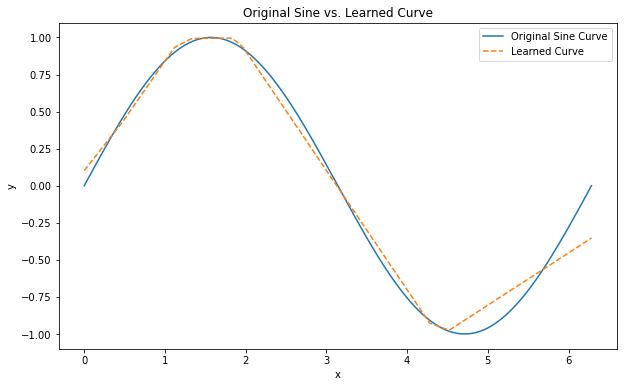

In [6]:
# Generate predictions
with torch.no_grad():
    predicted = model(x_tensor).numpy()

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Sine Curve')
plt.plot(x, predicted, label='Learned Curve', linestyle='dashed')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Sine vs. Learned Curve')
plt.show()


# Using LSTM

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate data
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)

# Convert to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1, 1)  # Reshape to (num_samples, sequence_length, num_features)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Define the LSTM model
class LSTMNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(LSTMNet, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Take the output of the last time step
        return out

input_size = 1
hidden_size = 50
output_size = 1
num_layers = 1

# Instantiate the LSTM model
model = LSTMNet(input_size, hidden_size, output_size, num_layers)

# Choose Loss Function and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training Loop
num_epochs = 5000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')






Epoch [1000/5000], Loss: 0.0000
Epoch [2000/5000], Loss: 0.0000
Epoch [3000/5000], Loss: 0.0000
Epoch [4000/5000], Loss: 0.0000
Epoch [5000/5000], Loss: 0.0000


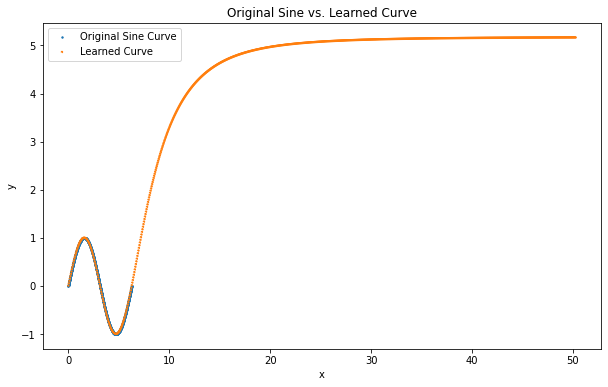

In [13]:
# Generate data
x_test = np.linspace(0, 16 * np.pi, 1000)
y_test = np.sin(x)

# Convert to PyTorch tensors
x_tensor_test = torch.tensor(x_test, dtype=torch.float32).view(-1, 1, 1)  # Reshape to (num_samples, sequence_length, num_features)
y_tensor_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
# Generate predictions
with torch.no_grad():
    predicted = model(x_tensor_test).numpy()
# Plot the Results
plt.figure(figsize=(10, 6))
plt.scatter(x, y,s=2, label='Original Sine Curve')
plt.scatter(x_test, predicted,s=2, label='Learned Curve', linestyle='dashed')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Sine vs. Learned Curve')
plt.show()